# Regularization 

#### 🎯 Learning Goals

1. Understand when a linear model can go wrong - so-called **pathological cases**!
1. What is regularization?
2. What is l1 and l2 regularisation?
4. Understand how to use `scikit-learn` to solve linear regression problems with regularization.

In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

## Pathological cases or what can go wrong in a seemingly simple model class

You have derived earlier the closed form solution of the linear model: $\hat{\beta}= (X^TX)^{-1}X^Ty$. What has been implicit in this derivation is that $X^TX$ is invertible. This assumption is violated should
+ there be more features than observations
+ there be perfect collinearity, i.e. one feature can be perfectly predicted by the other features (linearly).

Further, when the determinant of $(X^TX)^{-1}$ is close to zero, the inverse of  $(X^TX)^{-1}$ is numerically instable. Small perturbations in the data translate into sizeable changes in the inverse and hence estimated coefficients. 

#### Toy Examples

The code below generates some artificial data to illustrate this point. First let's see when $X$ does not have full rank, we will not be able to compute the inverse.

**Example 1** Perfect collinearity

In [2]:
# Generate a matrix with linearly dependent columns
# For simplicity, we'll create a 3x3 matrix with two identical columns
X = np.array([[1, 2, 3],
              [4, 8, 12],
              [7, 14, 21]])

# Calculate X^T * X
XTX = np.dot(X.T, X)

# Check the rank of X^T * X
rank_XTX = np.linalg.matrix_rank(XTX)
print(f"Rank of X^T * X: {rank_XTX}")

# Attempt to compute the inverse of X^T * X
inv_XTX = np.linalg.inv(XTX)

Rank of X^T * X: 1


LinAlgError: Singular matrix

#### ➡️ ✏️ Task 1

Can you think of a case with real data where we may encounter this perfect collinearity?

**Example 2** More features than observations

In [3]:
X =  np.array([[1, 2, 5, 11],
              [4, 8, 13, 22]])

# Calculate X^T * X
XTX = np.dot(X.T, X)

# Check the rank of X^T * X
rank_XTX = np.linalg.matrix_rank(XTX)
print(f"Rank of X^T * X: {rank_XTX}")

# Attempt to compute the inverse of X^T * X
inv_XTX = np.linalg.inv(XTX)

Rank of X^T * X: 2


LinAlgError: Singular matrix

#### ➡️ ✏️ Task 2

Can you think of applications where we may have more feature than observations?

_______
### Towards Ridge

When we have perfect collinearity note that we can introduce perturbations so that we can still solve for the inverse of the matrix. One smart idea would be to add the perturbation for all on-diagonal elements, i.e.

$$A' = A + \lambda I $$

#### ➡️ ✏️ Task 3

Let's revisit our stylized example, i.e. take the matrix 

\begin{pmatrix}
 1 & 2 & 3 \\
 4 & 8 & 12 \\
 7 & 14 & 21
\end{pmatrix}

and use $\lambda = 1$ to perturb the matrix. Verify how the determinant of this matrix changes and that you are able to invert the matrix. Why does this method guarantee to resolve perfect collinearity?

In [4]:
# Your solution
np.linalg.det(np.array([[1, 2, 3], [4, 8, 12], [7, 14, 21]]) + 1*np.eye(3))

30.999999999999986

In [5]:
# Without manipulation
np.linalg.det(np.array([[1, 2, 3], [4, 8, 12], [7, 14, 21]]))
# Reason by adding non-zero elements to the diagonal automatically get rid of any kind of linear dependence.

0.0

________
## Regularization - Recap

Regularization refers to a technique to shrink coefficient estimates towards zero. We will discuss l1 and l2 regularization, which are referred to as Lasso and Ridge regression respectively. Regularization is a powerful concept in machine learning.

### Ridge Regression

In the Ridge regression the loss is extended by a term, which depends on the magnitude on the estimated coefficients and $\lambda$, which is a tuning parameter. 

$$\frac{1}{n}\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_{j}x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j ^2$$

#### ➡️ ✏️ Task 4

Go back to the lecture slides and look at the closed-form solution for Ridge. What do you observe? How does Ridge mechanically solve the collinearity issue? 

*Your solution*

#### ➡️ ✏️ Task 5

Complete the function below to compute the loss above. The function takes as input numpy arrays $y, X, \beta$ and a scalar $\lambda$.

In [6]:
# Your solution
def my_ridge_loss(y, x, beta, lambda_):  # lambda is reserved in Python, hence lambda_
    np.mean((y-X@beta)**2) + sum(lambda_ * beta**2)

### Lasso Regression

In the lasso the loss is also added by a term, which depends on the absolute magnitude of the estimated coefficients:

$$\frac{1}{n}\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_{j}x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j |$$

#### ➡️ ✏️ Task 6

Complete the function below to compute the loss above. The function takes as input numpy arrays $y, X, \beta$ and a scalar $\lambda$.

In [7]:
# Your solution
def my_lasso_loss(y, x, beta, lambda_):  # lambda is reserved in Python, hence lambda_
    np.mean((y-X@beta)**2) + sum(lambda_ * np.abs(beta))

________
## Regularization - In Action

In our practical application, we take Kaggel data where the task is to predict readability of a text. As predictors we have 768 numerical features which were derived from the text using a pre-trained NLP model. Check this [Kaggle notebook](https://www.kaggle.com/code/uocoeeds/lecture-2b-data-preprocessing-ii/notebook) for details and to try it on your own if you are interested.

In [8]:
df = pd.read_csv("data/readability_train.csv")

#### ➡️ ✏️ Task 7

Inspect the data and briefly explain why regularization makes sense in the given setting?

In [9]:
# Your solution

df.shape
# Regularization makes sense as we have more regressors (features) than observations.

(500, 770)

### Best practice standardize data

The penalty is the same for all $\beta$ coefficients but $\beta$ coefficients are scale dependent. For this reason, the data is first standardized to ensure that regularization works in a similar manner on the different variables involved independent of their scale. 

#### ➡️ ✏️ Task 8

Check whether the features are standardized. If not, standardize the features. Demean the outcome.

In [10]:
# Your solution
check = df[df.columns[~df.columns.isin(["target", "excerpt"])]].describe().T
(check["std"] == 1).sum()
mask = df.columns.isin(["target", "excerpt"])
df.loc[:, df.columns[~mask]] = (df[df.columns[~mask]] - df[df.columns[~mask]].mean(axis=0)) / df[df.columns[~mask]].std(axis=0)
df["target"] -= df["target"].mean() 

#### ➡️ ✏️ Task 9

Execute the code below and interpret the figure.

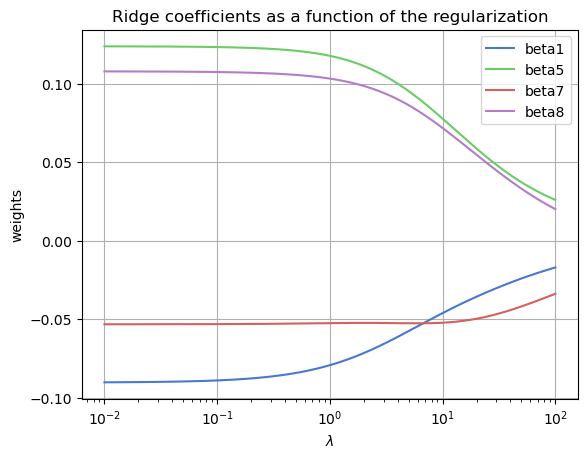

In [11]:
X = df[df.columns[~mask]]
y = df["target"]

n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

coefs = pd.DataFrame(coefs, columns=["beta" + f"{i}" for i in range(1, 769)])
# Make a plot of the coefficients depending on regularization
ax = plt.gca()
ax.plot(alphas, coefs["beta1"], label="beta1")
ax.plot(alphas, coefs["beta5"], label="beta5")
ax.plot(alphas, coefs["beta7"], label="beta7")
ax.plot(alphas, coefs["beta8"], label="beta8")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("$\lambda$")
ax.set_ylabel("weights")
ax.set_title("Ridge coefficients as a function of the regularization")
ax.grid()

#### ➡️ ✏️ Task 10

Repeat the same exercise as before but now for the lasso.

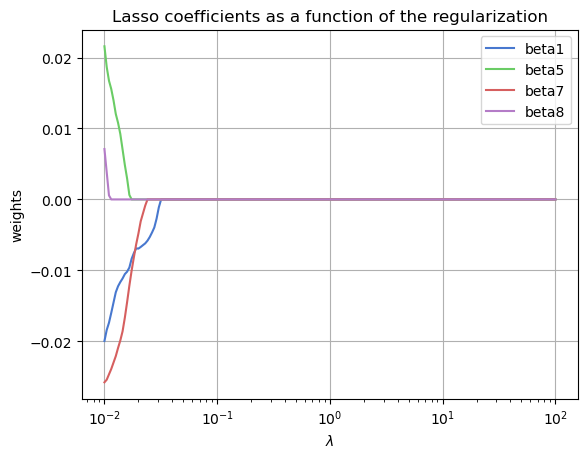

In [12]:
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)


coefs = pd.DataFrame(coefs, columns=["beta" + f"{i}" for i in range(1, 769)])
# Make a plot of the coefficients depending on regularization
ax = plt.gca()
ax.plot(alphas, coefs["beta1"], label="beta1")
ax.plot(alphas, coefs["beta5"], label="beta5")
ax.plot(alphas, coefs["beta7"], label="beta7")
ax.plot(alphas, coefs["beta8"], label="beta8")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("$\lambda$")
ax.set_ylabel("weights")
ax.set_title("Lasso coefficients as a function of the regularization")
ax.grid()

#### ➡️ ✏️ Task 11

Compare the lasso and Ridge. What differences do you observe? What happens for the lasso when $\lambda$ (our notation) (alpha in `scikit-learn`) notation is set to 1? 

#### ➡️ ✏️ Task 12

Derive 5 models for different versions of $\lambda$ and predict readability for the new data as defined below. What do you observe? Is the performance on the new data the same for all models?

In [13]:
df_new = pd.read_csv("data/readability_test.csv")

_____
#### &#x1F52D; Regularization Big Picture

We may wish to deploy regularization to increase the predictive performance of your model out of sample, i.e. make your model generalize better. You will talk about this concept much more in tomorrow's session. 